In [1]:
#melakukan instalasi 
!pip install tensorflow opencv-python matplotlib


In [2]:
#import library
import tensorflow as tf
import os

In [3]:
#mengoptimalisasi kinerja dengan CPU
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
#cleaning
import cv2
import imghdr

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16416\2050153905.py:3: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [8]:
# Impor modul yang diperlukan
from keras.preprocessing.image import ImageDataGenerator

# Augmentasi data
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [9]:
#melakukan load agar menghasilkan kelas
import numpy as np
from matplotlib import pyplot as plt

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 557 files belonging to 2 classes.


In [11]:
data_iterator = data.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

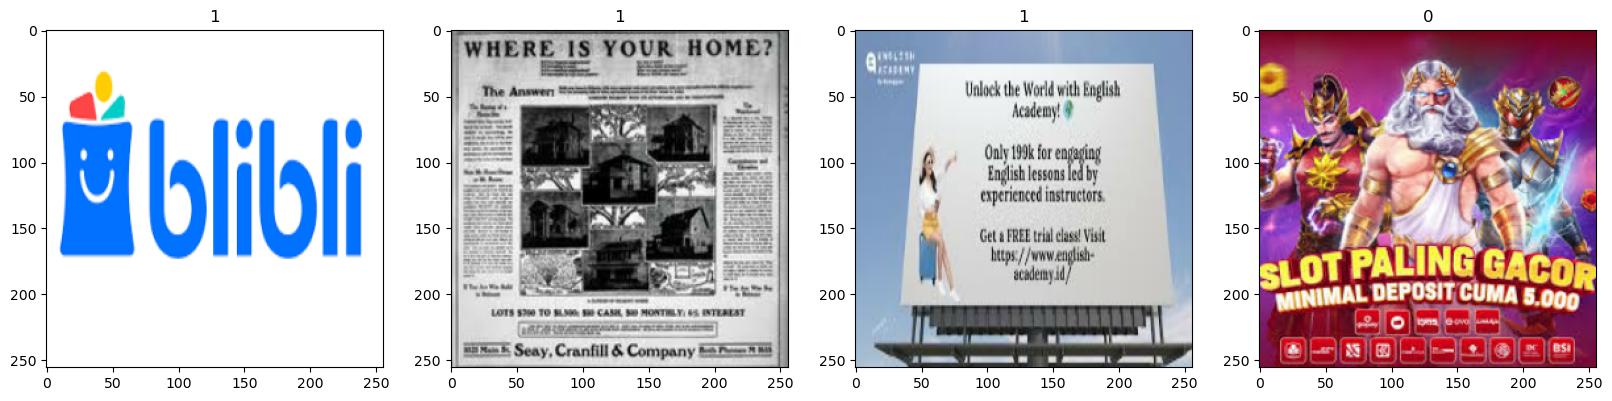

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
#scale data
data = data.map(lambda x,y: (x/255, y))

In [16]:
data.as_numpy_iterator().next()

(array([[[[0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          ...,
          [0.22405073, 0.2513265 , 0.19455135],
          [0.25674307, 0.30136576, 0.23203364],
          [0.4257755 , 0.47810394, 0.3813515 ]],
 
         [[0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          ...,
          [0.2146269 , 0.26340142, 0.19799086],
          [0.26851305, 0.32625037, 0.25785413],
          [0.3424551 , 0.421009  , 0.32309234]],
 
         [[0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          [0.9764706 , 0.9764706 , 0.9764706 ],
          ...,
          [0.21381165, 0.26644647, 0.21157514],
          [0.27634853, 0.3496022 , 0.28419167],
          [0.2892329 , 0.38475987, 0.29346088]],
 
         ...,
 
         [[0.709712  , 0.75677085, 0.37043506],
          [0.71294

In [17]:
#split data
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size

12

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [20]:
#Model Deep Learning dengan CNN
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [22]:
model = Sequential()

In [23]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [26]:
#Training
logdir='logs'

In [27]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [28]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


12/12 [==============================] - 9s 562ms/step - loss: 1.1044 - accuracy: 0.5182 - val_loss: 0.5684 - val_accuracy: 0.6875
Epoch 2/20
12/12 [==============================] - 6s 443ms/step - loss: 0.5137 - accuracy: 0.7396 - val_loss: 0.4986 - val_accuracy: 0.7396
Epoch 3/20
12/12 [==============================] - 6s 431ms/step - loss: 0.4943 - accuracy: 0.7448 - val_loss: 0.3657 - val_accuracy: 0.8438
Epoch 4/20
12/12 [==============================] - 6s 437ms/step - loss: 0.3892 - accuracy: 0.8177 - val_loss: 0.4407 - val_accuracy: 0.7812
Epoch 5/20
12/12 [==============================] - 6s 440ms/step - loss: 0.3490 - accuracy: 0.8464 - val_loss: 0.2981 - val_accuracy: 0.9062
Epoch 6/20
12/12 [==============================] - 6s 435ms/step - loss: 0.2874 - accuracy: 0.8854 - val_loss: 0.2706 - val_accuracy: 0.8750
Epoch 7/20
12/12 [==============================] - 7s 520ms/step - loss: 0.2540 - accuracy: 0.8958 - val_loss: 0.2905 - val_accuracy: 0.8750
Epoc

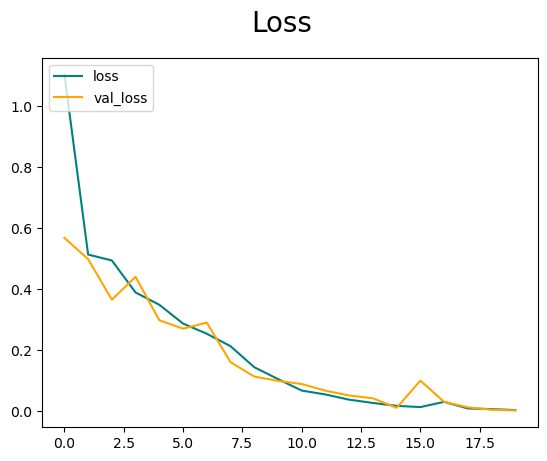

In [29]:
#membuat grafik plot untuk akurasi
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

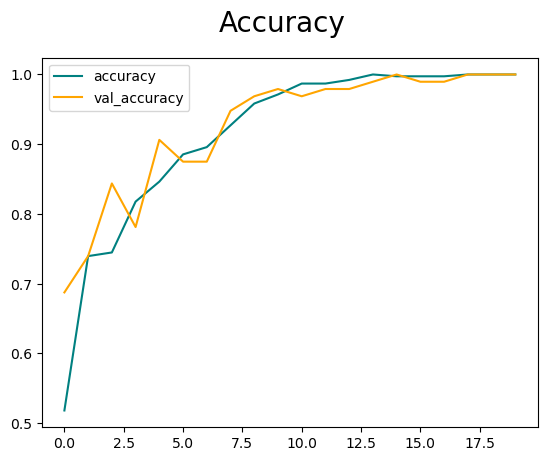

In [30]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [31]:
#Evaluasi
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
import numpy as np
import matplotlib.pyplot as plt


In [32]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [33]:
# Inisialisasi variabel untuk TP, TN, FP, FN
TP = 0
TN = 0
FP = 0
FN = 0

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    
    if yhat.ndim > 1 and yhat.shape[1] > 1:
        # Jika prediksi berbentuk probabilitas multi-kelas, gunakan argmax
        yhat_labels = np.argmax(yhat, axis=1)
    else:
        # Jika prediksi berbentuk label langsung (misalnya, model biner), threshold 0.5
        yhat_labels = (yhat > 0.5).astype(int).reshape(-1)
    
    # Asumsikan y adalah label satu dimensi (bukan one-hot encoded)
    y_true_labels = y

    pre.update_state(y_true_labels, yhat_labels)
    re.update_state(y_true_labels, yhat_labels)
    acc.update_state(y_true_labels, yhat_labels)

    TP += np.sum((yhat_labels == 1) & (y_true_labels == 1))
    TN += np.sum((yhat_labels == 0) & (y_true_labels == 0))
    FP += np.sum((yhat_labels == 1) & (y_true_labels == 0))
    FN += np.sum((yhat_labels == 0) & (y_true_labels == 1))

1/1 [==============================] - 0s 270ms/step


In [35]:
precision = pre.result().numpy()
recall = re.result().numpy()
accuracy = acc.result().numpy()

In [36]:
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Accuracy: {accuracy:.4f}')
print(f'True Positives (TP): {TP}')
print(f'True Negatives (TN): {TN}')
print(f'False Positives (FP): {FP}')
print(f'False Negatives (FN): {FN}')

Precision: 1.0000
Recall: 1.0000
Accuracy: 1.0000
True Positives (TP): 16
True Negatives (TN): 16
False Positives (FP): 0
False Negatives (FN): 0


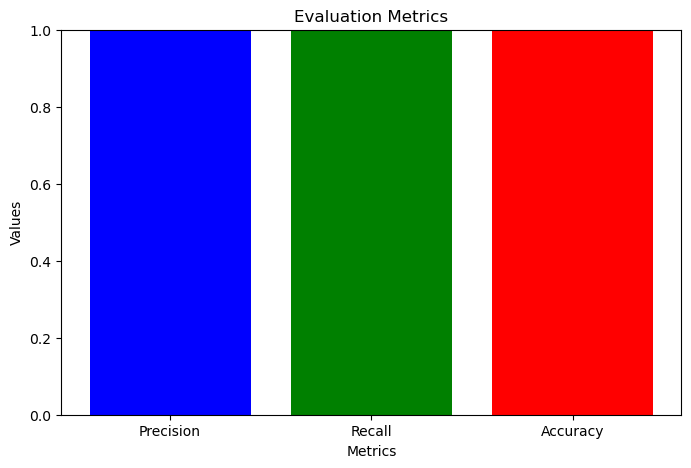

In [37]:
metrics = {'Precision': precision, 'Recall': recall, 'Accuracy': accuracy}
names = list(metrics.keys())
values = list(metrics.values())

plt.figure(figsize=(8, 5))
plt.bar(names, values, color=['blue', 'green', 'red'])
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Evaluation Metrics')
plt.ylim(0, 1)
plt.show()

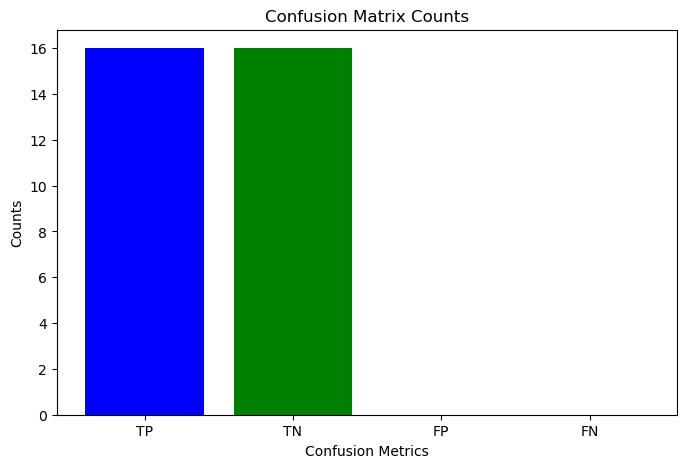

In [38]:
confusion_metrics = {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}
confusion_names = list(confusion_metrics.keys())
confusion_values = list(confusion_metrics.values())

plt.figure(figsize=(8, 5))
plt.bar(confusion_names, confusion_values, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Confusion Metrics')
plt.ylabel('Counts')
plt.title('Confusion Matrix Counts')
plt.show()

In [39]:
#Testing
import cv2

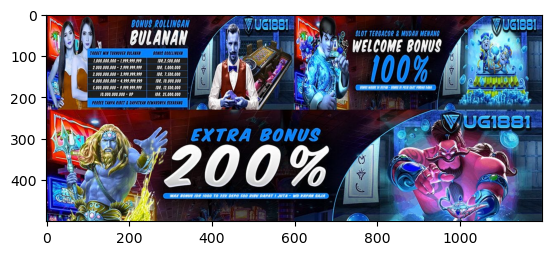

In [40]:
img = cv2.imread('testingfile/fotojudol/judoltes17.jpg')
plt.imshow(img)
plt.show()

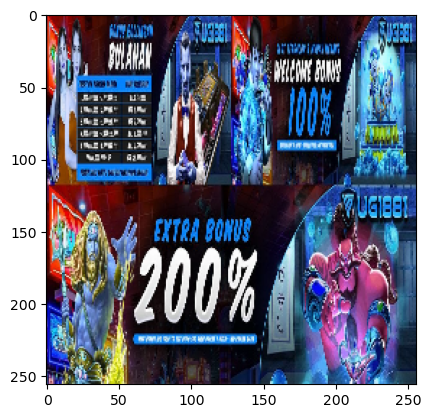

In [41]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [42]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 140ms/step


In [43]:
yhat

array([[0.00768216]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Non Judi')
else:
    print(f'Predicted class is Judi')

Predicted class is Judi


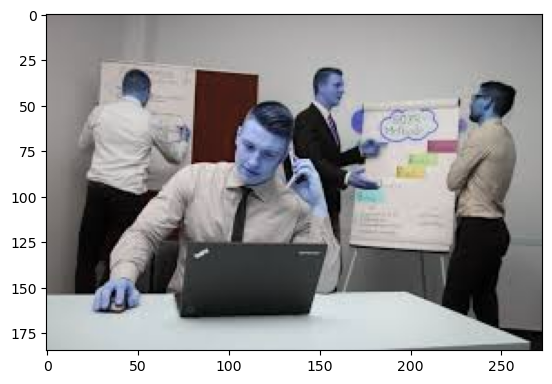

In [45]:
img = cv2.imread('testingfile/fotononjudol/9.jpg')
plt.imshow(img)
plt.show()

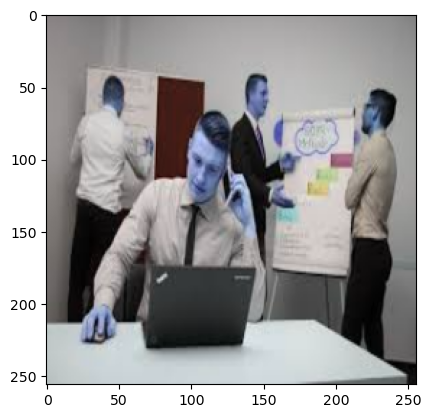

In [46]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [47]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 [==============================] - 0s 42ms/step


In [48]:
yhat

array([[0.9985883]], dtype=float32)

In [49]:
if yhat > 0.5: 
    print(f'Predicted class is Non Judi')
else:
    print(f'Predicted class is Judi')

Predicted class is Non Judi


In [64]:
#SAVE MODEL
from tensorflow.keras.models import load_model

In [65]:
model.save(os.path.join('models','newmodels2.h5'))

In [102]:
new_model = load_model(os.path.join('models', 'imageclassifier.h5'))

In [103]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 108ms/step


In [82]:
#integrasi web
from tensorflow.keras.models import load_model
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import tensorflow as tf
from IPython.display import Image as IPImage, display
from bs4 import BeautifulSoup
from urllib.parse import urljoin, urlparse

# Fungsi untuk mengunduh dan membaca gambar dari URL
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content)).convert('RGB')
    return img

# Fungsi untuk mengekstraksi URL gambar dari halaman web
def extract_image_urls(url):
    image_urls = []
    try:
        response = requests.get(url)
        response.raise_for_status()  # Check for request errors
        soup = BeautifulSoup(response.text, 'html.parser')
        
        for img in soup.find_all('img'):
            img_url = img.get('src')
            if img_url:
                # Convert relative URL to absolute URL
                img_url = urljoin(url, img_url)
                
                # Ensure the URL is valid and well-formed
                parsed_url = urlparse(img_url)
                if parsed_url.scheme in ['http', 'https']:
                    image_urls.append(img_url)
    except Exception as e:
        print("Error:", e)
    return image_urls

# Fungsi untuk menampilkan gambar dan prediksi
def display_and_predict_images(image_urls, model):
    predictions = []
    
    for img_url in image_urls:
        try:
            img = load_image_from_url(img_url)
            img_array = np.array(img)
            
            # Preprocess image for the model
            resize = tf.image.resize(img_array, (256, 256))
            img_expanded = np.expand_dims(resize / 255.0, axis=0)  # Normalize and add batch dimension
            
            # Make prediction
            yhat = model.predict(img_expanded)
            class_name = 'Non Judi' if yhat > 0.5 else 'Judi'
            
            # Append to predictions list
            predictions.append((img_url, class_name, yhat))
            
        except Exception as e:
            print(f"Error processing image {img_url}: {e}")

    # Sort predictions to display 'Judi' first
    predictions.sort(key=lambda x: x[1])  # Sort by class name ('Judi' will come before 'Non Judi')

    for img_url, class_name, yhat in predictions:
        try:
            display(IPImage(url=img_url))
            print(f'Predicted class: {class_name}')
        except Exception as e:
            print(f"Error displaying image {img_url}: {e}")

# URL dari website yang ingin Anda ambil gambar-gambarnya
website_url = "https://polri.go.id/"

# Mengambil URL gambar dari website
image_urls = extract_image_urls(website_url)

# Muat model h5 Anda
model = load_model('models/modelbaru8.h5')  # Corrected path

# Menampilkan gambar-gambar dan prediksi
display_and_predict_images(image_urls, model)


1/1 [==============================] - 0s 17ms/step


Predicted class: Judi


Predicted class: Judi


Predicted class: Judi


Predicted class: Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi


Predicted class: Non Judi
